# py-SP(k) - Examples

Here, we give a few examples of how some of the functions contained within py-SP(k) can be used to predict the suppression of the total matter power spectrum due to baryonic physics. For a detailed description of the model and how it was developed see the original paper in [Salcido et al. (2023)](https://academic.oup.com/mnras/article/523/2/2247/7165765).

First, let us import the necessary modules. For this tutorial you will need to have the following modules installed:
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/stable/index.html)
- [cycler](https://pypi.org/project/cycler/)
- [pyspk](https://github.com/jemme07/pyspk)
- [astropy](https://www.astropy.org/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cycler import cycler
import pyspk.model as spk
from astropy.cosmology import FlatLambdaCDM

# Set some figure parameters for visualisation.
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.labelsize'] = 15

## Example 1: Using a power-law fit to the $f_b$ - $M_\mathrm{halo}$ relation

In our first example, we will provide py-SP(k) with the (approximate)power-law fitted parameters to the fiducial BAHAMAS simulations ([McCarthy et al. 2017](https://academic.oup.com/mnras/article/465/3/2936/2417021)) at redshift $z=0.125$. We will use a spherical-overdensity of 200 times the critical density of the Universe. The functional form used is:

$$f_b / (\Omega_b/\Omega_m) = a \left(\frac{M_{200c}}{10^{13.5}\mathrm{M}_\odot} \right)^{b}$$

For this example, the power-law has been normalised at pivot point of $M_\mathrm{halo} = 10^{13.5} \mathrm{M}_\odot$. If a pivot point is not given, `spk.sup_model()` uses a default pivot point of $M_\mathrm{halo} = 1 \mathrm{M}_\odot$.  

In [2]:
z = 0.125
fb_a = 0.4
fb_pow = 0.3
fb_pivot = 10 ** 13.5

k, sup = spk.sup_model(SO=200, z=z, fb_a=fb_a, fb_pow=fb_pow, fb_pivot=fb_pivot, k_max=10, verbose=True)

Using power-law fit for fb - M_halo at z=0.125, normalised at M_halo = 3.16e+13 [M_sun] 


/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/4150528398.py:6: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  k, sup = spk.sup_model(SO=200, z=z, fb_a=fb_a, fb_pow=fb_pow, fb_pivot=fb_pivot, k_max=10, verbose=True)


Note the warning that has been raised due to the `k_max` requested. One can override this behaviour using:

```python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
```

Users must beware that this will also suppress additional useful information about the use and behaviour of py-SP(k).


We can have a look at what the suppression looks like at this redshift.

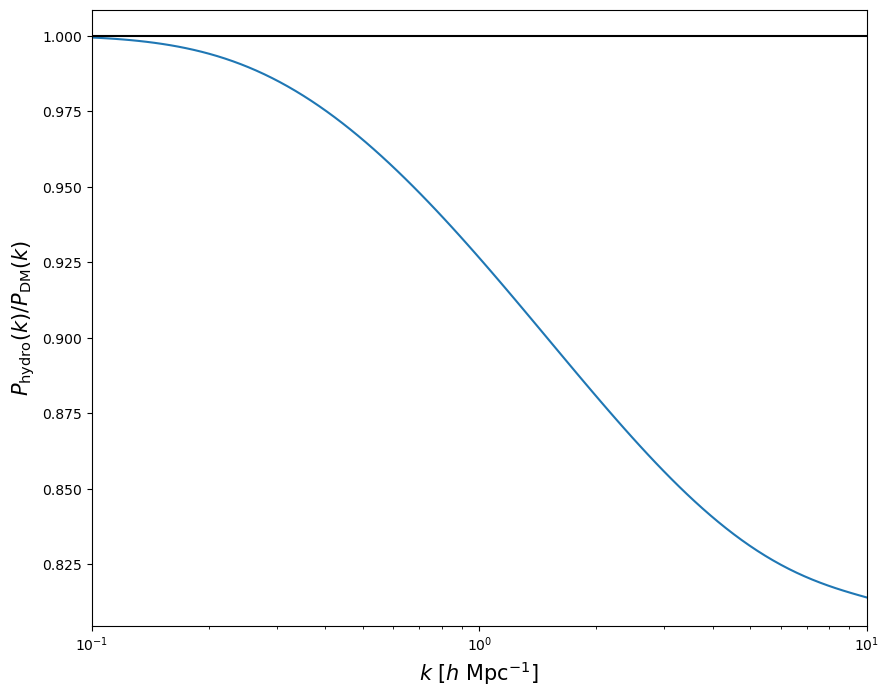

In [3]:
plt.figure()
plt.plot(k, sup)
plt.xscale('log')

plt.axhline(1, c='k')
plt.xlabel('$k$ [$h$ Mpc$^{-1}$]');
plt.ylabel('$P_\\mathrm{hydro}(k)/P_\\mathrm{DM}(k)$');
plt.xlim(0.1, 10);

## Example 2: Confidence intervals

We can also ask `spk.model()` to provide the bootstrapped 68% and 95% confidence interval from statistical errors using the flag `errors`.

We will use a power-law again but at $z=1$, and use a spherical-overdensity of 500.

In [4]:
k, sup, error_68_m, error_68_p, error_95_m, error_95_p = spk.sup_model(SO=500, 
                                                                       z=1, 
                                                                       fb_a=.7, 
                                                                       fb_pow=.1, 
                                                                       fb_pivot=fb_pivot, 
                                                                       k_max=12, 
                                                                       errors=True)

/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/2782762830.py:1: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  k, sup, error_68_m, error_68_p, error_95_m, error_95_p = spk.sup_model(SO=500,


Now we can have a look at the predicted suppression with the $1\sigma$ and $2\sigma$ statistical uncertainties.

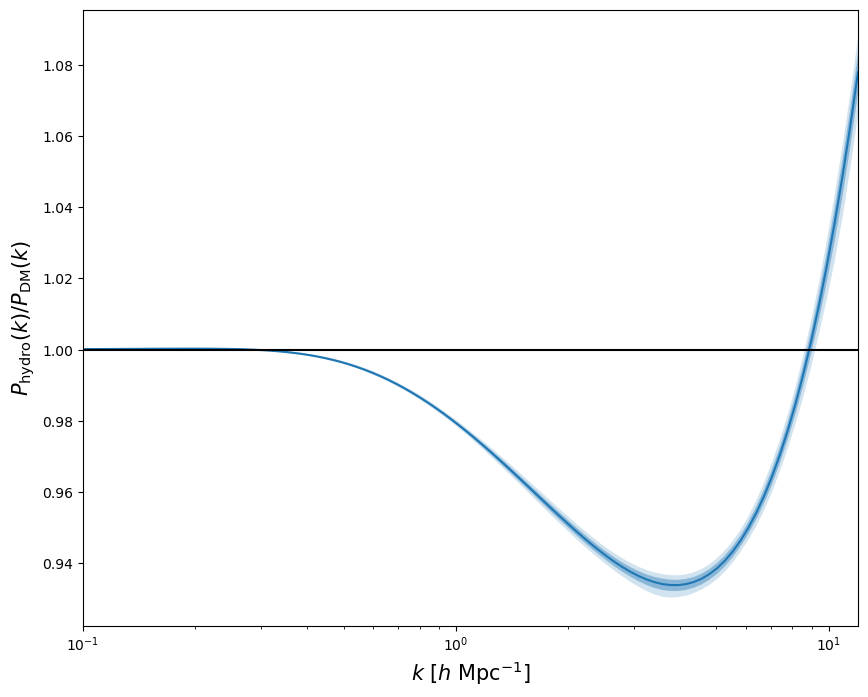

In [5]:
c = 'C0'
plt.figure()
plt.plot(k, sup, c=c)
plt.fill_between(k, sup + error_95_m, sup + error_95_p, facecolor=c, alpha=0.2)
plt.fill_between(k, sup + error_68_m, sup + error_68_p, facecolor=c, alpha=0.4)
plt.xscale('log')

plt.axhline(1, c='k')
plt.xlabel('$k$ [$h$ Mpc$^{-1}$]');
plt.ylabel('$P_\\mathrm{hydro}(k)/P_\\mathrm{DM}(k)$');
plt.xlim(0.1, 12);

## Example 3: Getting the optimal mass

We can also use py-SP(k) to obtain the optimal mass as a function of scale and redshift, as defined in [Salcido et al. (2023)](https://academic.oup.com/mnras/article/523/2/2247/7165765).. 

For this example we will use a spherical-overdensity of 200. We will provide the `spk.optimal_mass()` function with an array of scales at which we want to compute the optimal mass.

We will compute the optimal mass at redshift $z=0.4$.


In [6]:
k = np.logspace(-1, 1, 100)
z = 0.4
om = spk.optimal_mass(SO=200, z=z, k=k)

/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/3104584527.py:3: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  om = spk.optimal_mass(SO=200, z=z, k=k)


We can plot the optimal mass as function of scale at the specified redshift.

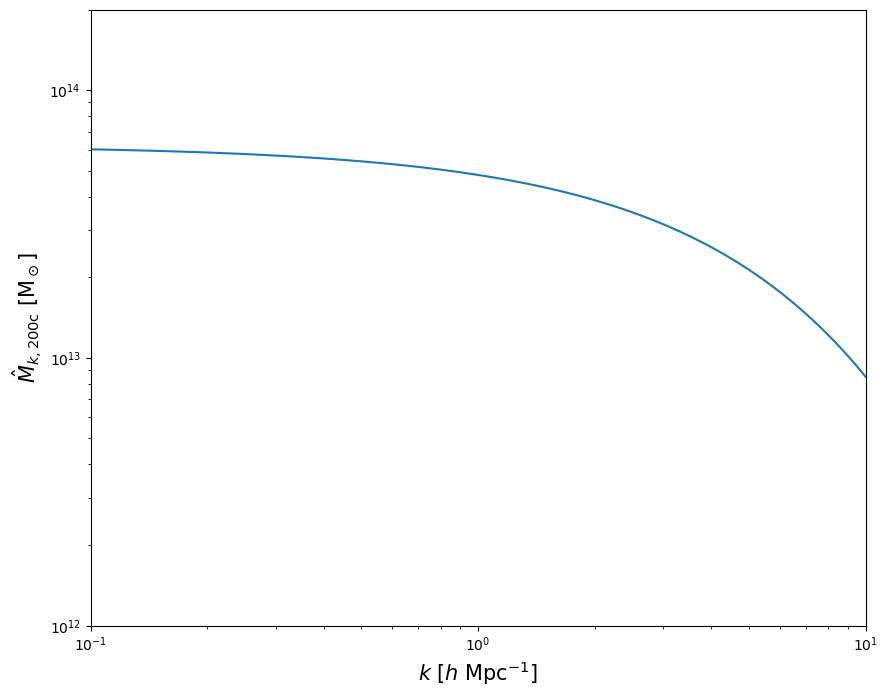

In [7]:
plt.figure()
plt.plot(k, om)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('$k$ [$h$ Mpc$^{-1}$]');
plt.ylabel('$\\hat{M}_{k,200\\mathrm{c}}\\,\\, [\\mathrm{M}_\\odot]$');
plt.xlim(0.1, 10);
plt.ylim(1e12, 2e14);

## Example 4: Redshift-dependent power-law fit to the $f_b$ - $M_\mathrm{halo}$ relation

In this example, we will provide py-SP(k) modified version of the functional form presented in Akino et al. 2022, to fit the total $f_b$ - $M_\mathrm{halo}$ relation as follows:

$$f_b/(\Omega_b/\Omega_m)= \left(\frac{e^\alpha}{100}\right) \left(\frac{M_{500c}}{10^{14} \mathrm{M}_ \odot}\right)^{\beta - 1} \left(\frac{E(z)}{E(0.3)}\right)^{\gamma},$$

where $\alpha$ sets the power-law normalisation, $\beta$ sets power-law slope, $\gamma$ provides the redshift dependence and $E(z)$ is the usual dimensionless Hubble parameter. 

We will use a flat LambdaCDM cosmology, but any `astropy` cosmology could be used instead.

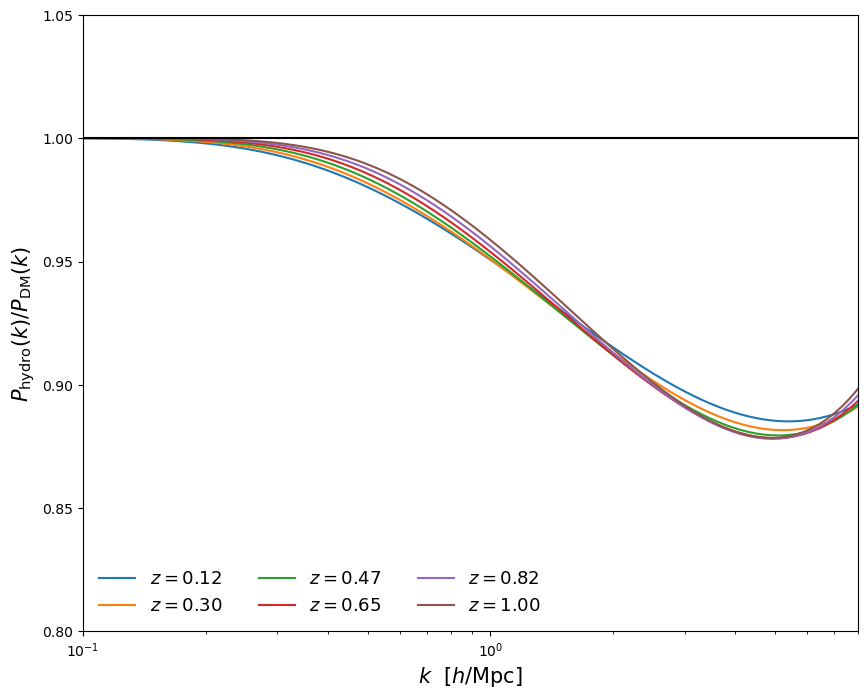

In [8]:
H0 = 70 
Omega_m = 0.2793
cosmo = FlatLambdaCDM(H0=H0, Om0=Omega_m) 

alpha = 4.16
beta = 1.2
gamma = 0.39

z_list = np.linspace(0.125, 1, 6)

for z in z_list:
    k, sup = spk.sup_model(SO=500, z=z, alpha=alpha, beta=beta, gamma=gamma, cosmo=cosmo)
    plt.plot(k, sup, label='$z=%.2f$' % z)

plt.axhline(1, c='k')
plt.xlim(1e-1, 8)
plt.ylim(0.8, 1.05)
plt.legend(loc=3, ncol=3, fontsize=13, frameon=False)
plt.xscale('log')
plt.xlabel('$k$  $[h/\\mathrm{Mpc}]$');
plt.ylabel('$P_\\mathrm{hydro}(k)/P_\\mathrm{DM}(k)$');

## Example 5: Using binned data for the $f_b$ - $M_\mathrm{halo}$ relation

In this example, we will use the baryon fraction binned in bins of halo mass from the BAHAMAS simulations ([McCarthy et al. 2017](https://academic.oup.com/mnras/article/465/3/2936/2417021)).

First we will load and take a look at the data. 

The columns are as follow: Redshift, Halo mass [$\mathrm{M}_\odot$], Baryon fraction (normalised by the Universal baryon fraction).

In [9]:
df = pd.read_csv('BAHAMAS_fb_M200.csv')
df

,z,M200,f_b
0,0.125,1.000000e+11,0.687368
1,0.125,1.258925e+11,0.695632
2,0.125,1.584893e+11,0.703069
3,0.125,1.995262e+11,0.741934
4,0.125,2.511886e+11,0.768164
...,...,...,...
516,3.000,2.511886e+13,0.753568
517,3.000,3.162278e+13,0.793468
518,3.000,3.981072e+13,0.753835
519,3.000,5.011872e+13,0.843562


We can use `pandas` to group the data by redshift as follows:

In [10]:
z_grouped = df.groupby('z')

We can now compute and plot the suppression of the total matter power spectrum for each redshift using py-SP(k).

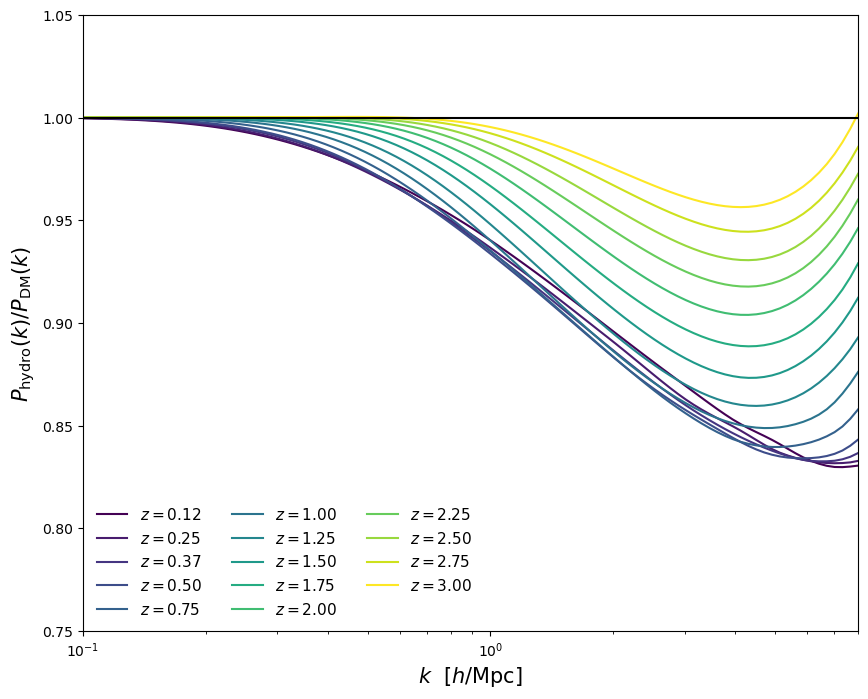

In [11]:
color = plt.cm.viridis(np.linspace(0, 1, len(z_grouped.groups.keys())))
custom_cycler = iter(cycler(color=color))

for z, group in z_grouped:
    c = next(custom_cycler)['color']
    k, sup = spk.sup_model(SO=200, z=z, M_halo=group.M200, fb=group.f_b)
    plt.plot(k, sup, label='$z=%.2f$' % z, c=c)

plt.axhline(1, c='k')
plt.xlim(1e-1, 8)
plt.ylim(.75, 1.05)
plt.legend(loc=3, ncol=3, fontsize=11, frameon=False)
plt.xscale('log')
plt.xlabel('$k$  $[h/\\mathrm{Mpc}]$');
plt.ylabel('$P_\\mathrm{hydro}(k)/P_\\mathrm{DM}(k)$');

## Example 6: Fitting limits

py-SP(k) has built-in fitting limits. `spk.sup_model()` will not raise and error but will return `NaNs` for values of baryon fraction outside the fitting range. 

In this example, we will request the fitting limits at $z=0.5$ using `spk.get_limits()`. We will provide a power-law that falls outside hose limits at some mass range. Note the warning message from `spk.sup_model()` specifying the out-of-bounds range.


In [12]:
SO = 500
z = 0.5
fb_a = 0.2
fb_pow = 0.8
fb_pivot = 10 ** 13.5
k, sup = spk.sup_model(SO=SO, z=z, fb_a=fb_a, fb_pow=fb_pow, fb_pivot=fb_pivot)

# We use the wavenumbers from the previous function to obtain the optimal mass at those scales. 
om = spk.optimal_mass(SO=SO, z=z, k=k)

# Get the baryon fraction with a power-law function. 
fb = fb_a * np.power(om / fb_pivot, fb_pow)

# Get fitting limits.
min_fb, max_fb = spk.get_limits(SO=SO, z=z, m_halo=om)

/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/2394130939.py:6: UserWarning: Found baryon fraction values outside fitting limits. fb < lower_limit between 1.2e+13 <= M_halo [M_sun] <= 2.1e+13. sup_model() will return NaNs within those limits. 
  k, sup = spk.sup_model(SO=SO, z=z, fb_a=fb_a, fb_pow=fb_pow, fb_pivot=fb_pivot)


We can visualise the baryon fraction and fitting limits, as well as the predicted $P(k)$ suppression (within the fitting limits). 

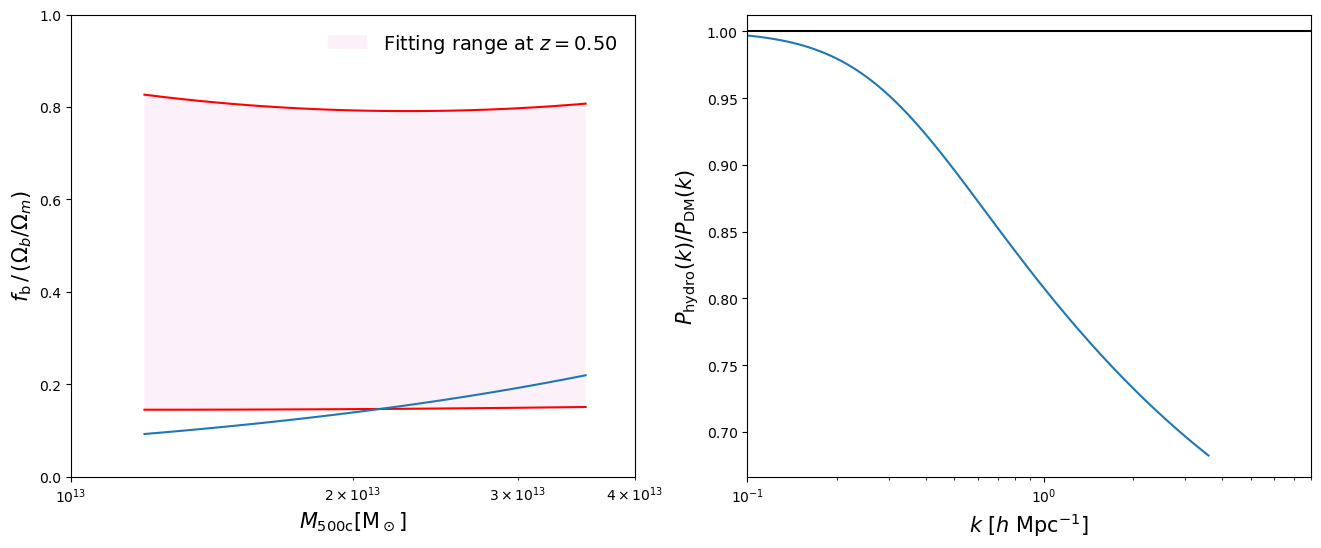

In [13]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(om, min_fb, c='r')
ax1.plot(om, max_fb, c='r')
ax1.fill_between(om, min_fb, max_fb, facecolor='C6', alpha=0.1, label='Fitting range at $z=%.2f$' %z)
ax1.plot(om, fb)

ax1.legend(frameon=False, fontsize=14)
ax1.set_xscale('log')
ax1.set_ylim(0, 1);
ax1.set_xlim(1e13, 4e13);
ax1.set_xlabel('$M_{500\\mathrm{c}}[\\mathrm{M}_\\odot]$');
ax1.set_ylabel('$f_\mathrm{b} \\, / \\, (\\Omega_b/\\Omega_m)$');

ax2.plot(k, sup, c='C0')

ax2.set_xscale('log')
ax2.axhline(1, c='k')
ax2.set_xlabel('$k$ [$h$ Mpc$^{-1}$]');
ax2.set_ylabel('$P_\\mathrm{hydro}(k)/P_\\mathrm{DM}(k)$');
ax2.set_xlim(0.1, 8);

## Example 7: Binned data extrapolation 

When the baryon fraction - halo mass relation is not known for the entire range of masses required to predict the power spectrum suppression at a specific redshift, users can enable `spk.sup_model()` to extrapolate to out-of-bounds points based on first and last intervals using the `extrapolate` flag. 

In this example, we will first use `spk.optimal_mass()` to obtain the mass range required to predict the $P(k)$ suppression at $z=0.75$ from $0.1 \leq k [h / \mathrm{Mpc}] \leq 12$. 

In [14]:
z = 0.75
om = spk.optimal_mass(SO=200, z=z, k=[12, .1])
print(om)

[4.48546740e+12 3.25254714e+13]


/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/767816649.py:2: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  om = spk.optimal_mass(SO=200, z=z, k=[12, .1])


We can see that the mass range required is $5.4 \times 10^{12} \mathrm{M}_\odot$ to $3.4 \times 10^{13} \mathrm{M}_\odot$.

We will use the binned data from BAHAMAS at $z = 0.75$, but will only assume that only data for $M_{200c} \geq 1.5 \times 10^{13}$ is available. 

In [15]:
# Select z = 0.75
data = df.loc[df.z == z]
data.reset_index(inplace=True, drop=True)

# Only use data with M_200 >= 1.5e13 M_sun
limited_data = data.loc[data.M200 >= 1.5e13]

Let us plot the complete dataset and the "limited data". The x axis range shows the required range to predict the suppression to $P(k)$ from $0.1 \leq k [h / \mathrm{Mpc}] \leq 12$. 

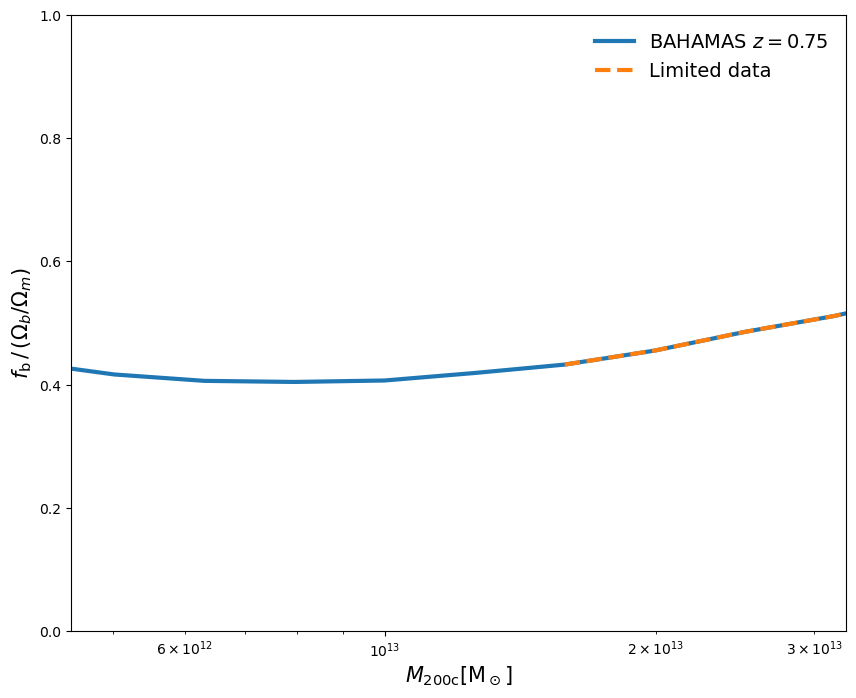

In [16]:
plt.plot(data.M200, data.f_b, lw=3, label='BAHAMAS $z=%.2f$' %z)
plt.plot(limited_data.M200, limited_data.f_b, ls='--', lw=3, label='Limited data')

plt.legend(frameon=False, fontsize=14)
plt.xscale('log')
plt.ylim(0, 1);
plt.xlim(om[0], om[1]);
plt.xlabel('$M_{200\\mathrm{c}}[\\mathrm{M}_\\odot]$');
plt.ylabel('$f_\mathrm{b} \\, / \\, (\\Omega_b/\\Omega_m)$');

We will plot the predictions from `spk.sup_model()` for the complete dataset, the limited data only, and for the limited data using extrapolation. 

Note that extrapolation is preformed in $\mathrm{log}_{10} (f_b)$ - $\mathrm{log}_{10} (M_\mathrm{halo})$ space. 

/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/2916484847.py:2: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  k, sup = spk.sup_model(SO=200, z=z, M_halo=data.M200, fb=data.f_b, k_max=12)
/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/2916484847.py:6: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  k, sup = spk.sup_model(SO=200, z=z, M_halo=limited_data.M200, fb=limited_data.f_b, k_max=12)
/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_3686/2916484847.py:10: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  k, sup = spk.sup_model(SO=200, z=z, M_halo=limited_data.M200, fb=limited_data.f_b, k_max=12, extrapolate=True)


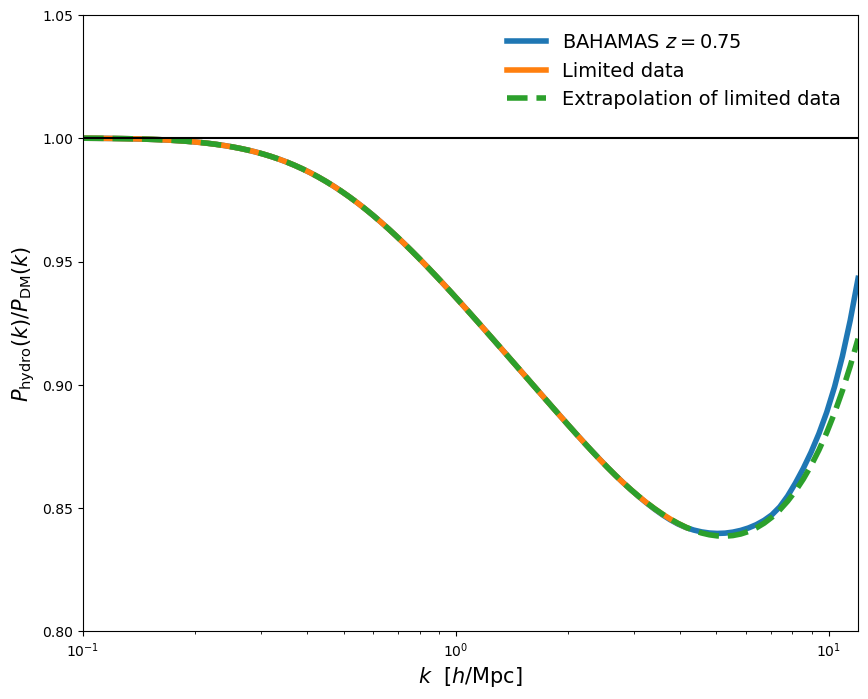

In [17]:
# First plot the suppression predicted from the the complete dataset.
k, sup = spk.sup_model(SO=200, z=z, M_halo=data.M200, fb=data.f_b, k_max=12)
plt.plot(k, sup, label='BAHAMAS $z=%.2f$' % z, lw=4)

# Now plot the suppression for the limited data only. 
k, sup = spk.sup_model(SO=200, z=z, M_halo=limited_data.M200, fb=limited_data.f_b, k_max=12)
plt.plot(k, sup, label='Limited data', lw=4)

# Finally, plot the suppression using extrapolation of the limited data. 
k, sup = spk.sup_model(SO=200, z=z, M_halo=limited_data.M200, fb=limited_data.f_b, k_max=12, extrapolate=True)
plt.plot(k, sup, label='Extrapolation of limited data', ls='--', lw=4)

plt.axhline(1, c='k')
plt.xlim(1e-1, 12)
plt.ylim(.8, 1.05)
plt.legend(fontsize=14, frameon=False)
plt.xscale('log')
plt.xlabel('$k$  $[h/\\mathrm{Mpc}]$');
plt.ylabel('$P_\\mathrm{hydro}(k)/P_\\mathrm{DM}(k)$');

## Further help and documentation 

Further information can be found by using python help:

In [18]:
help(spk)

Help on module pyspk.model in pyspk:

NAME
    pyspk.model

FUNCTIONS
    get_limits(SO, z, m_halo)
        Function that returns the baryon fraction fitting limits as a function of halo mass
        and redshift.
        
        Parameters
        ----------
        SO : int
            spherical over-density. Only accepts 200 or 500
        z : float
            redshift z. Only accepts values of z <= 3
        m_halo: array of float
            halo mass in M_sun units
        
        Returns
        -------
        min_fb: array of float
            lower fitting limit for the baryon fraction normalised by the universal baryon fraction
        max_fb: array of float
            upper fitting limit for the baryon fraction normalised by the universal baryon fraction
    
    optimal_mass(SO, z, k, verbose=False)
        Optimal mass function as a function of scale and redshift for a specific 
        spherical over-density. Defined in eq.(2) in Salcido et al. (2023).
        
     